In [1]:
import pandas as pd
import numpy as np
from random import gauss, uniform, sample
import random
import collections
import matplotlib.pyplot as plt
%matplotlib inline

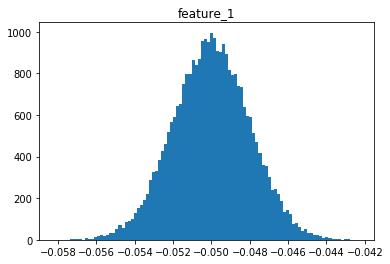

In [2]:
feature_1 = np.random.normal(loc = -0.05, scale = 0.002, size = 30000)
plt.hist(feature_1, bins = 100)
plt.title('feature_1');

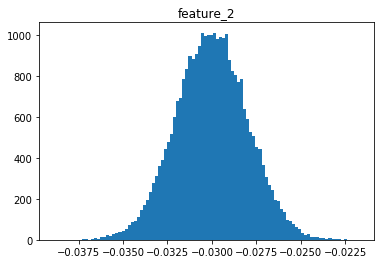

In [3]:
feature_2 = np.random.normal(loc = -0.03, scale = 0.002, size = 30000)
plt.hist(feature_2, bins = 100)
plt.title('feature_2');

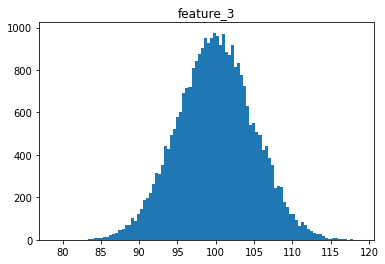

In [4]:
feature_3 = np.random.normal(loc = 100, scale = 5, size = 30000)
plt.hist(feature_3, bins = 100)
plt.title('feature_3');

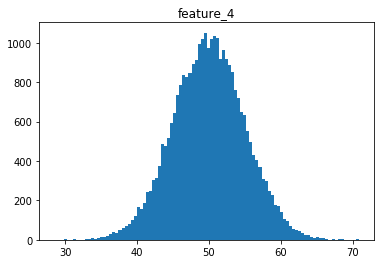

In [5]:
feature_4 = np.random.normal(loc = 50, scale = 5, size = 30000)
plt.hist(feature_4, bins = 100)
plt.title('feature_4');

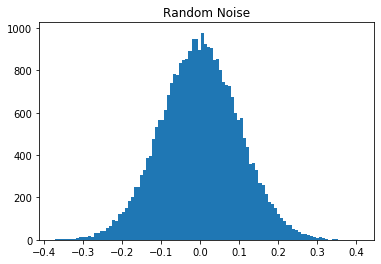

In [6]:
random_noise = [gauss(0, 0.1) for i in range(30000)]
plt.hist(random_noise, bins = 100)
plt.title('Random Noise');

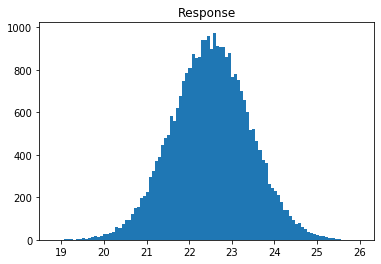

In [7]:
response = (250) * feature_1 + (-250) * feature_2 + (-0.1) * feature_3 + 0.05 * feature_4 + random_noise + 35

plt.hist(response, bins = 100)
plt.title('Response');

In [8]:
# Verify if synthetic data is calculated correctly

In [9]:
df = pd.DataFrame({'feature_1':feature_1, 'feature_2':feature_2, 'feature_3':feature_3, 
                   'feature_4':feature_4, 'response':response})
df.head()

,feature_1,feature_2,feature_3,feature_4,response
0,-0.050411,-0.030749,99.350499,43.447704,22.331327
1,-0.050089,-0.033066,115.818830,50.817333,21.791539
2,-0.050848,-0.027699,98.646082,62.510963,22.482583
3,-0.051141,-0.027826,101.469806,57.178633,21.906473
4,-0.046517,-0.030755,109.412227,47.729574,22.444643


In [10]:
X = df.iloc[:,:-1]
y = df['response']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-6, -0.1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0, max_iter=10000)

In [13]:
lasso_cv.fit(X_train, y_train)
lasso_cv.coef_

array([ 2.49144112e+02, -2.50037550e+02, -1.00077396e-01,  4.99641806e-02])

In [14]:
lasso_cv.alpha_

1e-06

In [15]:
lasso_cv.intercept_

34.96532912101194

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = lasso_cv.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

0.10061709640110113

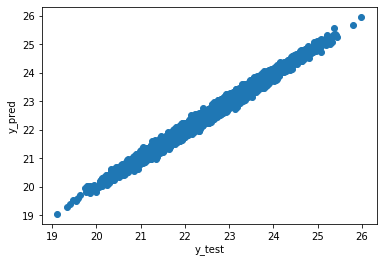

In [17]:
plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

In [18]:
# Coefficients and intercept are pretty close to the design values
# RMSE matches the std dev of the random_feature added to the response

In [19]:
# Add other random generated features
feature_list = []
for i in range(0, 196):
    feature = np.random.normal(loc = uniform(-150.0, 150.0), scale = uniform(0.1, 30), size = 30000)
    feature_list.append(feature)

In [20]:
random_features = pd.DataFrame(np.transpose(np.array(feature_list)))
random_features.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,-11.712358,96.320303,-61.171137,-125.452010,-101.098814,96.193179,-59.965495,23.708156,31.775944,-118.137718,...,-8.734063,22.504369,-80.445748,112.666023,79.843304,-80.007560,120.706699,127.561322,119.188544,133.364879
1,-10.953819,98.873851,-64.295015,-127.239891,-95.598393,159.987775,-81.744361,-36.726349,68.867905,-142.970823,...,-5.843120,25.441308,-89.362167,104.449914,120.200702,-110.498806,131.409845,151.825922,102.659434,176.964503
2,-6.930507,96.027650,-61.162197,-126.093965,-89.220575,171.893899,-58.365565,-21.581026,64.208599,-168.401430,...,-9.173084,17.970796,-88.430026,95.184179,98.818558,-75.729741,131.340791,126.912769,116.109328,146.440059
3,-3.357238,110.892906,-57.249175,-125.924208,-99.183968,102.019009,-64.068509,-24.616472,37.440010,-133.563734,...,-2.912801,17.897276,-91.011639,109.462833,127.382030,-110.425538,146.508293,136.029099,119.792343,163.981409
4,-7.294993,109.321723,-59.162760,-124.933728,-110.600768,138.520309,-26.525136,-9.433895,34.795533,-146.680531,...,5.285286,20.917701,-88.214321,105.814094,101.857188,-82.256957,132.008730,121.041332,117.727033,151.231831


In [21]:
random_features.columns = ["feature_{}".format(col+5) for col in random_features.columns]

In [22]:
random_features.head()

,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200
0,-11.712358,96.320303,-61.171137,-125.452010,-101.098814,96.193179,-59.965495,23.708156,31.775944,-118.137718,...,-8.734063,22.504369,-80.445748,112.666023,79.843304,-80.007560,120.706699,127.561322,119.188544,133.364879
1,-10.953819,98.873851,-64.295015,-127.239891,-95.598393,159.987775,-81.744361,-36.726349,68.867905,-142.970823,...,-5.843120,25.441308,-89.362167,104.449914,120.200702,-110.498806,131.409845,151.825922,102.659434,176.964503
2,-6.930507,96.027650,-61.162197,-126.093965,-89.220575,171.893899,-58.365565,-21.581026,64.208599,-168.401430,...,-9.173084,17.970796,-88.430026,95.184179,98.818558,-75.729741,131.340791,126.912769,116.109328,146.440059
3,-3.357238,110.892906,-57.249175,-125.924208,-99.183968,102.019009,-64.068509,-24.616472,37.440010,-133.563734,...,-2.912801,17.897276,-91.011639,109.462833,127.382030,-110.425538,146.508293,136.029099,119.792343,163.981409
4,-7.294993,109.321723,-59.162760,-124.933728,-110.600768,138.520309,-26.525136,-9.433895,34.795533,-146.680531,...,5.285286,20.917701,-88.214321,105.814094,101.857188,-82.256957,132.008730,121.041332,117.727033,151.231831


In [23]:
completed_df = df.merge(random_features, left_index=True, right_index=True)
completed_df = completed_df[[col for col in completed_df if col not in ['response']] + ['response']]

In [24]:
completed_df.shape

(30000, 201)

In [25]:
completed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,response
0,-0.050411,-0.030749,99.350499,43.447704,-11.712358,96.320303,-61.171137,-125.452010,-101.098814,96.193179,...,22.504369,-80.445748,112.666023,79.843304,-80.007560,120.706699,127.561322,119.188544,133.364879,22.331327
1,-0.050089,-0.033066,115.818830,50.817333,-10.953819,98.873851,-64.295015,-127.239891,-95.598393,159.987775,...,25.441308,-89.362167,104.449914,120.200702,-110.498806,131.409845,151.825922,102.659434,176.964503,21.791539
2,-0.050848,-0.027699,98.646082,62.510963,-6.930507,96.027650,-61.162197,-126.093965,-89.220575,171.893899,...,17.970796,-88.430026,95.184179,98.818558,-75.729741,131.340791,126.912769,116.109328,146.440059,22.482583
3,-0.051141,-0.027826,101.469806,57.178633,-3.357238,110.892906,-57.249175,-125.924208,-99.183968,102.019009,...,17.897276,-91.011639,109.462833,127.382030,-110.425538,146.508293,136.029099,119.792343,163.981409,21.906473
4,-0.046517,-0.030755,109.412227,47.729574,-7.294993,109.321723,-59.162760,-124.933728,-110.600768,138.520309,...,20.917701,-88.214321,105.814094,101.857188,-82.256957,132.008730,121.041332,117.727033,151.231831,22.444643


In [26]:
# Verify if complete data set of synthetic data is calculated correctly

In [27]:
X = completed_df.iloc[:,:-1]
y = completed_df['response']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LassoCV
alphas = np.logspace(-6, -0.1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=0, max_iter=10000)

In [29]:
lasso_cv.fit(X_train, y_train)
len(lasso_cv.coef_[abs(lasso_cv.coef_) > 0])

199

In [30]:
lasso_cv.alpha_

1e-06

In [31]:
lasso_cv.intercept_

35.16442403373627

In [32]:
coef = pd.DataFrame(lasso_cv.coef_, columns=['coefficient'])
coef.head()

,coefficient
0,249.162307
1,-250.038844
2,-0.100088
3,0.049954
4,-0.000092


RMSE: 0.10120671012860315
R2: 0.987491446254657


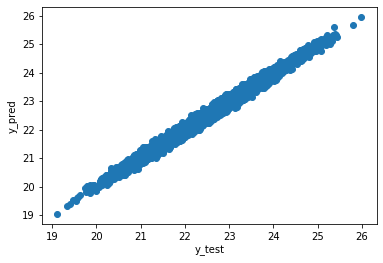

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lasso_cv.predict(X_test)
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

In [ ]:
# Coefficients and intercept are pretty close to the design values
# RMSE matches the std dev of the random_feature added to the response

In [36]:
# Create missing data for all columns so that a random 10% of each column has data to simulate actual measurement sampling schemes

In [433]:
sampled_df = completed_df.copy()

rows = list(range(0,30000))
random.shuffle(rows)
to_replace = int(round(.65*len(rows)))
to_further_replace = int(round(.5*to_replace))
for row in rows:
    if sampled_df.iloc[row,:-1].isna().sum() < sampled_df.shape[1]-1:
        sampled_df.iloc[row, :-1] = np.nan
        to_replace -= 1
        if to_replace == 0:
            break

for row in rows:
    if sampled_df.iloc[row,:-1].isna().sum() < sampled_df.shape[1]-1:
        col = random.sample(range(sampled_df.shape[1]-2), int(round(.5*(sampled_df.shape[1]-2))))
        sampled_df.iloc[row, col] = np.nan
        to_further_replace -= 1
        if to_further_replace == 0:
            break            
                     
sampled_df.dropna(axis = 0, how = 'any').shape

(750, 201)

In [437]:
# Export the data to a csv file
sampled_df.to_csv('data/data.csv', index = False)

In [434]:
# Verify if sampled data set of synthetic data is still predictive
X = sampled_df.iloc[:,:-1]
y = sampled_df['response']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X[:24000]
# X_test = X[24000:]
# y_train = y[:24000]
# y_test = y[24000:]

from sklearn.linear_model import LassoCV
#alphas = np.logspace(-3, -0.1, 100)
alphas = np.logspace(-6, -0.1, 100)
#alphas = [0.1,0.01]
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0, max_iter=10000)

In [435]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(X_train)

X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

In [436]:
lasso_cv.fit(X_train_scaled, y_train)
len(lasso_cv.coef_[abs(lasso_cv.coef_) > 0])

9

In [438]:
lasso_cv.alpha_

0.0004806380863064394

In [439]:
lasso_cv.intercept_

23.138445647546252

In [440]:
coef = pd.DataFrame(lasso_cv.coef_, columns=['coefficient'])
coef.head()

,coefficient
0,3.599928
1,-3.546351
2,-3.325584
3,1.865095
4,-0.000000


RMSE: 0.8056185738433782
R2: 0.19554386351744157


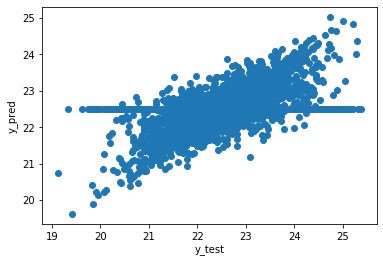

In [441]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lasso_cv.predict(X_test_scaled)
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

In [442]:
coef = pd.DataFrame(lasso_cv.coef_, columns=['coefficient'])
coef[coef['coefficient'] != 0]

,coefficient
0,3.599928
1,-3.546351
2,-3.325584
3,1.865095
7,0.032040
23,-0.013716
46,-0.038811
60,-0.004740
177,-0.011522


In [443]:
c = list(X_test.iloc[:,coef[coef['coefficient'] != 0].index].columns)
test_df = X_test.dropna(axis = 0, how='any', subset=c)
X_test_imp = imputer.transform(test_df)
X_test_scaled = scaler.transform(X_test_imp)
y_test = y_test[test_df.index]
X_test_scaled.shape

(160, 200)

RMSE: 0.09952257582807254
R2: 0.9891559769310818


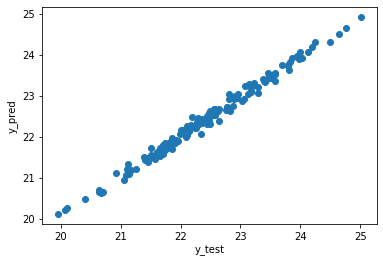

In [444]:
y_pred = lasso_cv.predict(X_test_scaled)
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

In [445]:
# Feature reduction before model training

In [446]:
corrs = pd.DataFrame(sampled_df.corr().iloc[-1])
corrs.head()

,response
feature_1,0.560240
feature_2,-0.551972
feature_3,-0.560960
feature_4,0.273410
feature_5,0.024933


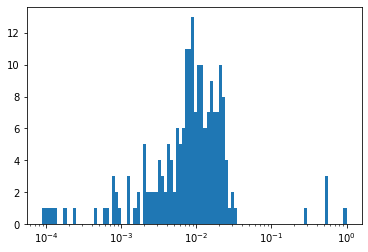

In [447]:
def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(abs(corrs['response']), 100)

In [448]:
sig_cols = corrs.loc[abs(corrs['response']) >= 0.1].index
sig_cols

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'response'], dtype='object')

In [449]:
sub_sampled_df = sampled_df[sig_cols]
sub_sampled_df.head()

,feature_1,feature_2,feature_3,feature_4,response
0,NaN,NaN,NaN,NaN,22.331327
1,NaN,NaN,NaN,NaN,21.791539
2,NaN,NaN,NaN,NaN,22.482583
3,NaN,NaN,NaN,NaN,21.906473
4,NaN,NaN,NaN,NaN,22.444643


In [450]:
X = sub_sampled_df.iloc[:,:-1]
y = sub_sampled_df['response']

In [451]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(X_train)

X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_scaled, y_train)

In [452]:
coef = pd.DataFrame(lr.coef_, columns=['coefficient'])
coef.head()

,coefficient
0,3.736470
1,-3.689319
2,-3.446368
3,2.039864


RMSE: 0.8056146425263071
R2: 0.1955517147873318


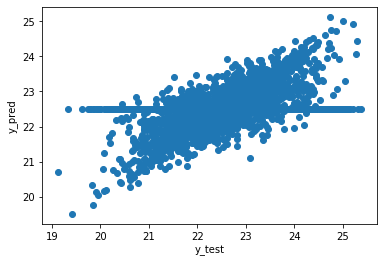

In [453]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test_scaled)
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

In [455]:
c = list(X_test.iloc[:,coef[coef['coefficient'] != 0].index].columns)
test_df = X_test.dropna(axis = 0, how='any', subset=c)
X_test_imp = imputer.transform(test_df)
X_test_scaled = scaler.transform(X_test_imp)
y_test = y_test[test_df.index]
X_test_scaled.shape

(283, 4)

RMSE: 0.10039087897444741
R2: 0.9882124114270479


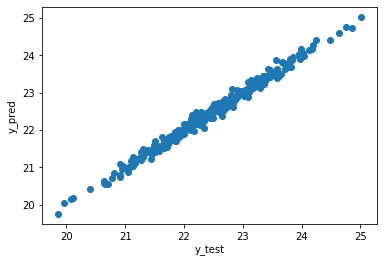

In [457]:
y_pred = lr.predict(X_test_scaled)
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {}'.format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test');

### In this case, doing manual feature reduction with simple linear regression gives the same result as lasso since the best lasso alpha is ~0